<a href="https://colab.research.google.com/github/eperezp2/Homework5/blob/main/Homework5Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 5

*   Erick Perez Pereo



# Problem 1

* Problem 1 (30 pts):

1. In our temperature prediction example, let’s change our model to a nonlinear system. Consider the following description for our model: w2 * t_u ** 2 + w1 * t_u + b.

2. Modify the training loop properly to accommodate this redefinition.

3.  Use 5000 epochs for your training. Explore different learning rates from 0.1 to 0.0001 (you need four separate trainings). Report your loss for every 500 epochs per training.

4.  Pick the best non-linear model and compare your final best loss against the linear model that we did during the lecture. For this, visualize the non-linear model against the linear model over the input dataset, as we did during the lecture. Is the actual result better or worse than our baseline linear model?



In [42]:
# Torch Libraries
import torch
import torch.optim as optim

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# X values
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
# Y values
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]


Def. for nonlinear model, loss, and training

In [43]:
#def nonlinear
def nonlinear_model(t_u, w2, w1, b):

    t_c = w2*t_u**2 + w1*t_u + b
    return t_c

#def of loss
def loss(t_p, t_c):

    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

#def of training
def nonlinear_training(epochs, optimizer, params, t_u_train, t_u_valid, t_c_train, t_c_valid):

    for epoch in range(1, epochs+1):
      t_p_train = nonlinear_model(t_u_train, *params)
      train_loss = loss(t_p_train, t_c_train)

      t_p_valid = nonlinear_model(t_u_valid, *params)
      valid_loss = loss(t_p_valid, t_c_valid)

      optimizer.zero_grad()
      train_loss.backward()
      optimizer.step()

      if epoch % 500 == 0:
        print(f'Epochs: {epoch}, \tTraining Loss: {train_loss:.6f}, \tValidation Loss: {valid_loss:.6f}\n')

    return params

Linear Optimization:

In [44]:
def linear_model1(t_u, w, b):
  return w*t_u + b

def linear_training1(epochs, optimizer, params, t_u_train, t_u_valid, t_c_train, t_c_valid):
  for epoch in range(1, epochs+1):
    t_p_train = linear_model1(t_u_train, *params)
    train_loss = loss(t_p_train, t_c_train)

    t_p_valid = linear_model1(t_u_valid, *params)
    valid_loss = loss(t_p_valid, t_c_valid)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    if epoch % 500 == 0:
        print(f'Epochs: {epoch}, \tTraining Loss: {train_loss:.6f}, \tValidation Loss: {valid_loss:.6f}\n')

  return params

Declare Temperature Values

In [51]:
t_u = torch.tensor(t_u)
t_c = torch.tensor(t_c)

<ipython-input-51-16cd9232fe63>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t_u = torch.tensor(t_u)
<ipython-input-51-16cd9232fe63>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t_c = torch.tensor(t_c)



SGD and Adam Optimizers

SGD Optimizers:

Learning rate of 0.1

Epochs: 500, 	Training Loss: nan, 	Validation Loss: nan

Epochs: 1000, 	Training Loss: nan, 	Validation Loss: nan

Epochs: 1500, 	Training Loss: nan, 	Validation Loss: nan

Epochs: 2000, 	Training Loss: nan, 	Validation Loss: nan

Epochs: 2500, 	Training Loss: nan, 	Validation Loss: nan

Epochs: 3000, 	Training Loss: nan, 	Validation Loss: nan

Epochs: 3500, 	Training Loss: nan, 	Validation Loss: nan

Epochs: 4000, 	Training Loss: nan, 	Validation Loss: nan

Epochs: 4500, 	Training Loss: nan, 	Validation Loss: nan

Epochs: 5000, 	Training Loss: nan, 	Validation Loss: nan

Learning rate of 0.01

Epochs: 500, 	Training Loss: nan, 	Validation Loss: nan

Epochs: 1000, 	Training Loss: nan, 	Validation Loss: nan

Epochs: 1500, 	Training Loss: nan, 	Validation Loss: nan

Epochs: 2000, 	Training Loss: nan, 	Validation Loss: nan

Epochs: 2500, 	Training Loss: nan, 	Validation Loss: nan

Epochs: 3000, 	Training Loss: nan, 	Validation Loss: nan

Epochs: 3500

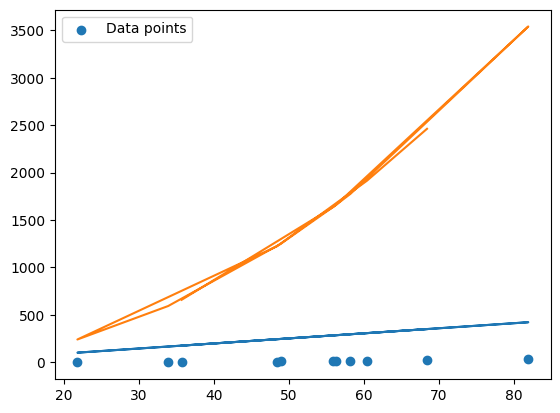

In [52]:
# Pre-processing and normalizing data
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]

val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]

train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u

# Create models w/ diff learning gates 0.1 - 0.001
learning_rates = [0.1, 0.01, 0.001, 0.0001]

# SGD Optimizers w/ different learning rates
print('SGD Optimizers:\n')
for rate in learning_rates:
  params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
  optimizer = optim.SGD([params], lr = rate)
  print(f'Learning rate of {rate}\n')
  nonlinear_training(epochs=5000, optimizer=optimizer, params=params, t_u_train=train_t_un, t_u_valid=val_t_un, t_c_train=train_t_c, t_c_valid=val_t_c)

# Adam Optimizers w/ diff learning rates
print('Adam Optimizers:\n')
for rate in learning_rates:
  params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
  optimizer = optim.Adam([params], lr = rate)
  print(f'Learning rates of {rate}\n')
  nonlinear_training(epochs=5000, optimizer=optimizer, params=params, t_u_train=train_t_un, t_u_valid=val_t_un, t_c_train=train_t_c, t_c_valid=val_t_c)

# Nonlinear vs Linear Models in a Plot
linear_params = torch.tensor([1.0, 0.0], requires_grad=True)
nonlinear_params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)

linear_optimizer = optim.SGD([linear_params], lr = 0.01)
nonlinear_optimizer = optim.SGD([nonlinear_params], lr = 0.0001)

linear = linear_training1(5000, linear_optimizer, linear_params, train_t_un, val_t_un, train_t_c, val_t_c)
nonlinear = nonlinear_training(5000, nonlinear_optimizer, nonlinear_params, train_t_un, val_t_un, train_t_c, val_t_c)

t_p_lin = linear_model1(t_u, *linear).detach().numpy()
t_p_non = nonlinear_model(t_u, *nonlinear).detach().numpy()

plt.scatter(t_u, t_c, label = 'Data points')
plt.plot(t_u, t_p_lin)
plt.plot(t_u, t_p_non)

plt.legend()
plt.show()